<a href="https://colab.research.google.com/github/mehrdadkazemi254/MachineLearning/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost is an ensemble method. it goes through the cycle below:
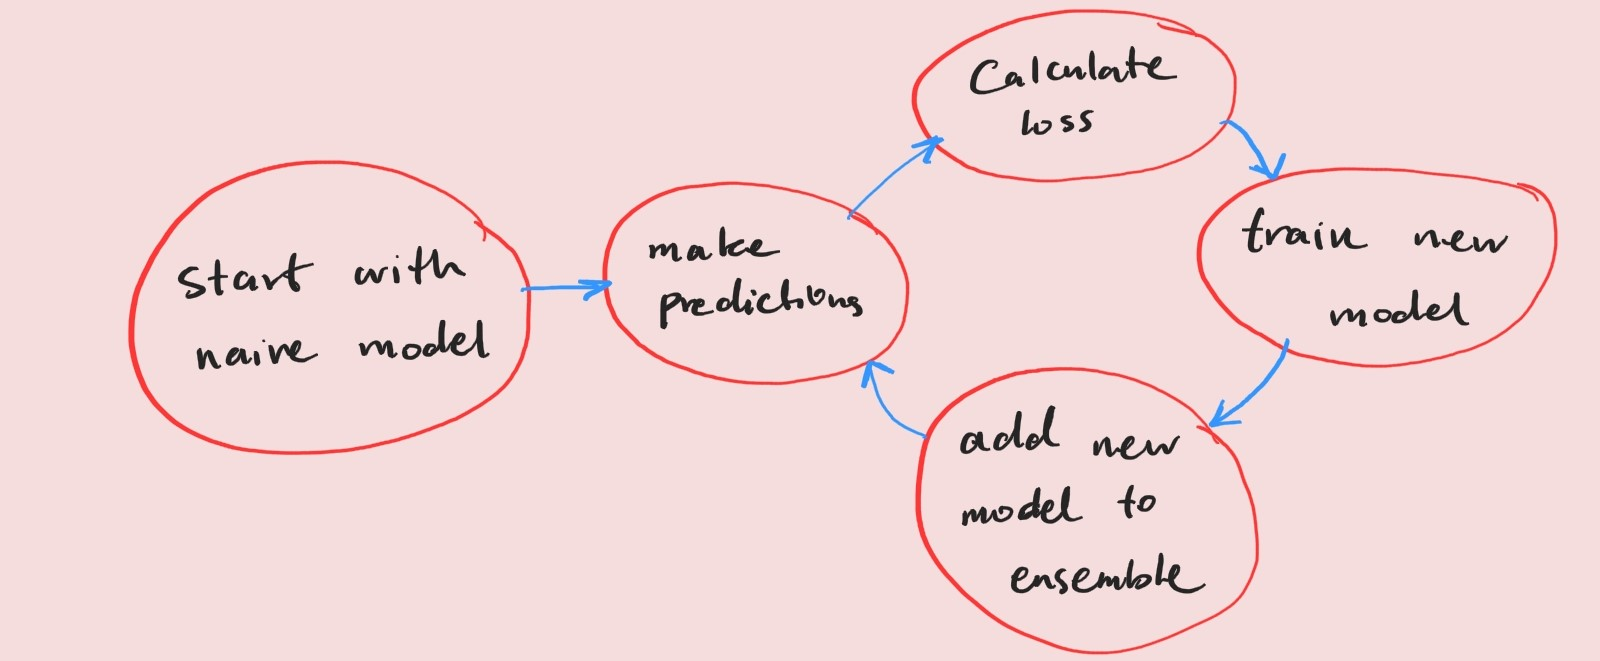

We first import the data which could be downloaded from here: https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('melb_data.csv')

columns_to_remain = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']

X = data[columns_to_remain]
y = data['Price']

X_train, X_valid, y_train, y_valid = train_test_split(X,y)

In [3]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train,y_train)

[11:37:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Our loss function would be Mean Absolute Error (MAE)

In [6]:
from sklearn.metrics import mean_absolute_error
predictions = my_model.predict(X_valid)

print(f" the mean absolute error is {mean_absolute_error(predictions,y_valid)}")

 the mean absolute error is 263329.1349871134


Now, we start parameter tuning our model
the documentation for each parameter could be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [46]:
my_model = XGBRegressor(n_estimators= 500, learning_rate= 0.01, n_jobs=4)
my_model.fit(X_train,y_train,verbose=False ,early_stopping_rounds = 5,eval_set=[(X_valid,y_valid)])

predictions = my_model.predict(X_vaild)

print(f" the mean absolute error is {mean_absolute_error(predictions,y_valid)}")

[12:40:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 the mean absolute error is 556332.8530927835
